In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

## Model Setup

In [2]:
print(os.getcwd())
model = YOLO('./../../runs/models/yolov8n_deer_and_wildboar_dataset_v6.pt')

c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation


In [ ]:
# path_test = "./../../.data/evaluation/img/vergleich/deer"
# results = model.predict(source=path_test, save=True, save_txt=True)
# metrics = model.val(data='./../../model_training/data.yaml')

# print(type(results))
# print(len(results))

x = 0

# for result in results:
#     x+=1
#     print(f"\n\n\033[4mBild Nummer{x}\033[0m\n")
#     if result.boxes.cls.numel() != 0:
#         for box in result.boxes:
#             print(f"Label: {int(box.cls)}; Confidence: {float(box.conf)}")        

In [4]:
def extract_values(results, class_counts, folder):
    x = 0
    
    for result in results:
        x+=1
        # print(f"\n\n\033[4mBild Nummer{x}\033[0m\n")
        if result.boxes.cls.numel() != 0:
            for box in result.boxes:
                class_counts[folder][str(int(box.cls))].append(float(box.conf))
        else:
            class_counts[folder]["no_deer_or_wild_boar"].append(5)
    return class_counts
# extract_values(results, class_counts, folder)

## Evaluation of Pictures

In [5]:
folders = os.listdir("./../../.data/evaluation/img/vergleich/erkennungsgenauigkeit")
# 0 = deer; 1 = wild_boar
classes = ["0", "1", "no_deer_or_wild_boar"]
class_counts = {'deer': {cls: [] for cls in classes},
                'no_animal': {cls: [] for cls in classes},
                'no_deer': {cls: [] for cls in classes}}
                # 'wild_boar': {cls: [] for cls in classes}}
for folder in folders:
    print(f"{folder}")
    results = model.predict(source=f"./../../.data/evaluation/img/vergleich/erkennungsgenauigkeit/{folder}")
    class_counts = extract_values(results, class_counts, folder)
class_counts
    

deer



image 1/40 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01010067.JPG: 480x640 2 deers, 92.6ms
image 2/40 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01010069.JPG: 480x640 1 deer, 61.6ms
image 3/40 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01020035.JPG: 480x640 2 deers, 62.4ms
image 4/40 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01020036.JPG: 480x640 3 deers, 61.6ms
image 5/40 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arb

{'deer': {'0': [0.9434897303581238,
   0.916863739490509,
   0.9647966623306274,
   0.9230407476425171,
   0.2708476185798645,
   0.9320622682571411,
   0.7238029837608337,
   0.47468218207359314,
   0.9404996633529663,
   0.9462410807609558,
   0.9332000613212585,
   0.9164389967918396,
   0.955392062664032,
   0.9255921244621277,
   0.9255921244621277,
   0.9582428932189941,
   0.942723274230957,
   0.9501400589942932,
   0.9443309307098389,
   0.9284480810165405,
   0.9595212936401367,
   0.9475805163383484,
   0.9581463932991028,
   0.8897634744644165,
   0.9129316806793213,
   0.8860042691230774,
   0.9594132900238037,
   0.8103392720222473,
   0.8082027435302734,
   0.9368603229522705,
   0.9535596370697021,
   0.553485631942749,
   0.9475663900375366,
   0.712470293045044,
   0.9448723793029785,
   0.6422882080078125,
   0.9682307839393616,
   0.36415427923202515,
   0.9179790019989014,
   0.7837585210800171,
   0.9567409753799438,
   0.5008833408355713,
   0.9373162984848022,
 

### Distribution of predictions for each folder

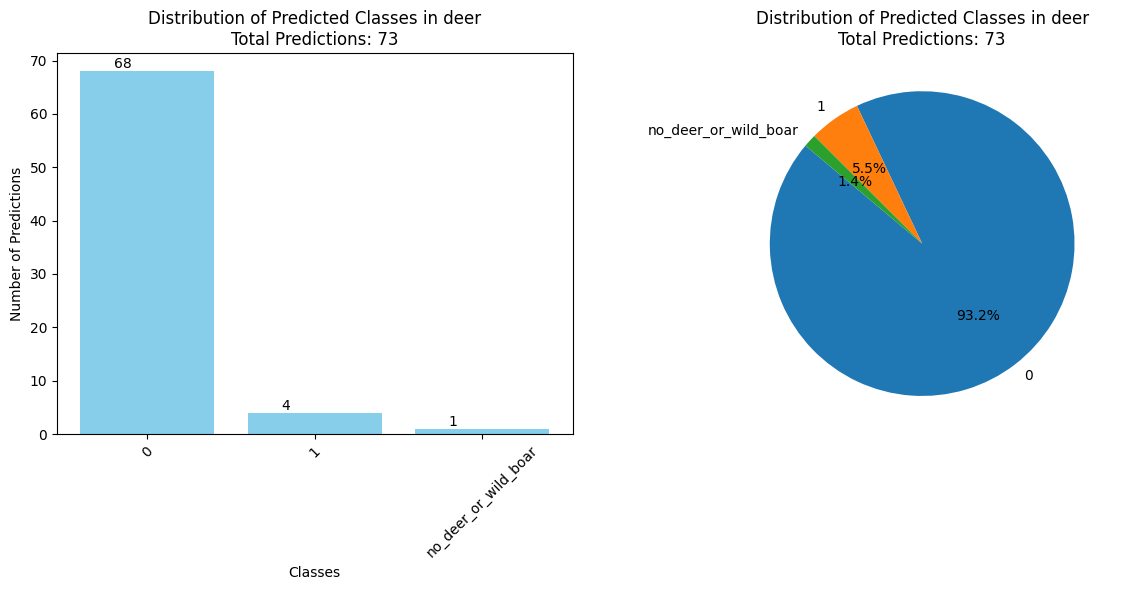

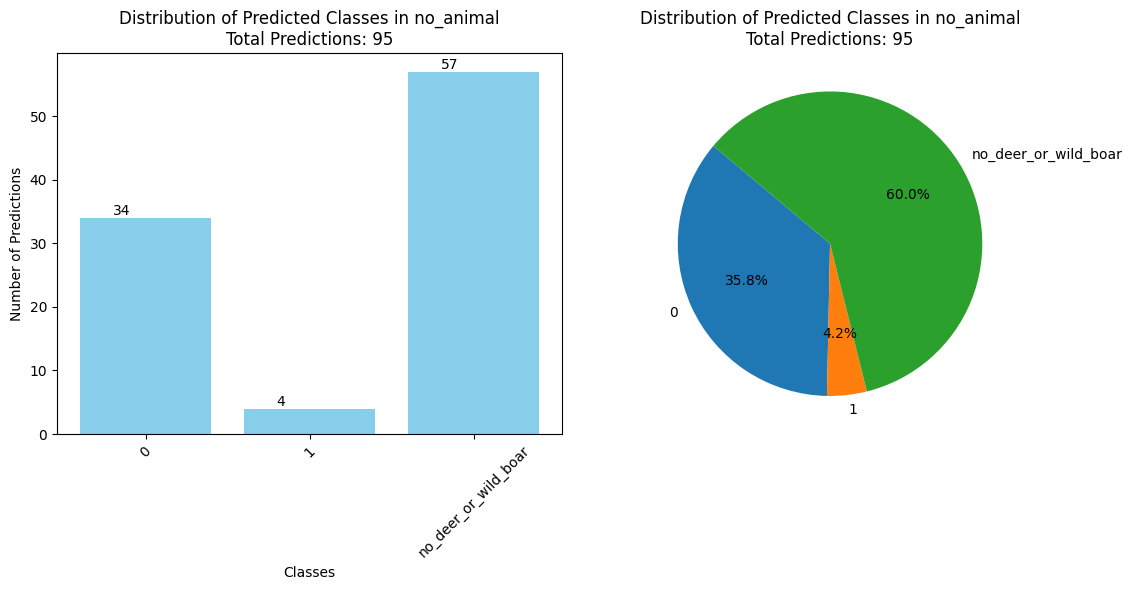

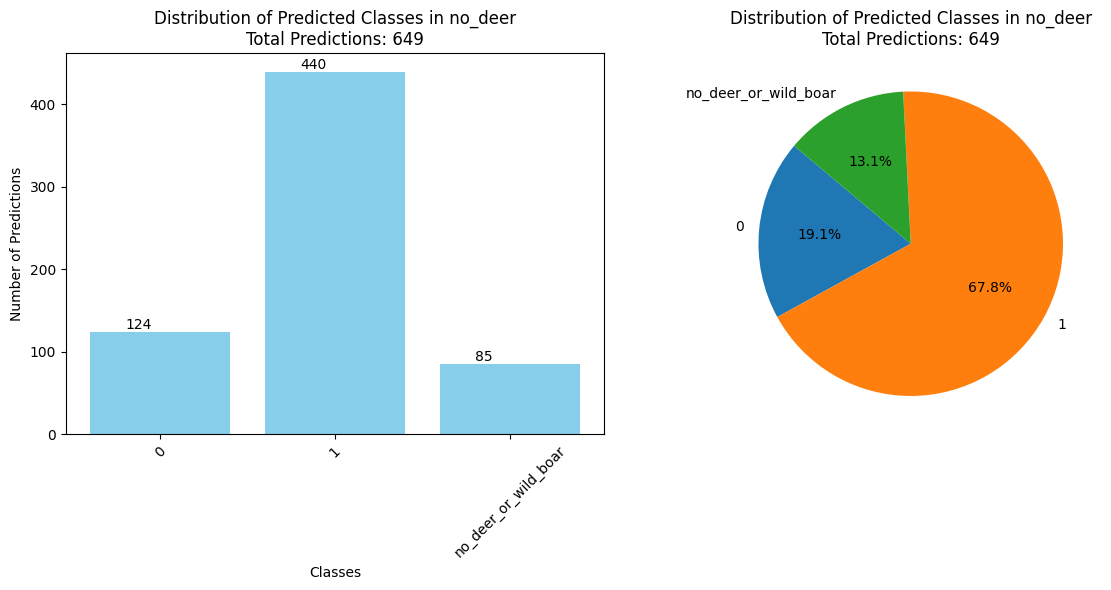

In [6]:
for folder in folders:
    # Total number of predictions for the current folder
    total_predictions = sum(len(class_counts[folder][cls]) for cls in classes)

    # Bar chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars = plt.bar(classes, [len(class_counts[folder][cls]) for cls in classes], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Predictions')
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')
    plt.xticks(rotation=45)

    # Adding exact numbers above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval, round(yval, 2), va='bottom')

    # Removing classes with 0 predictions for the pie chart
    nonzero_class_counts = {cls: len(class_counts[folder][cls]) for cls in classes if len(class_counts[folder][cls]) > 0}

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(nonzero_class_counts.values(), labels=nonzero_class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')

    plt.tight_layout()
    plt.show()

### Distribution of prediction values per class for each folder

C:\Users\Z0127829\AppData\Local\Temp\ipykernel_12412\147381925.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(predicted_values, labels=classes_new)


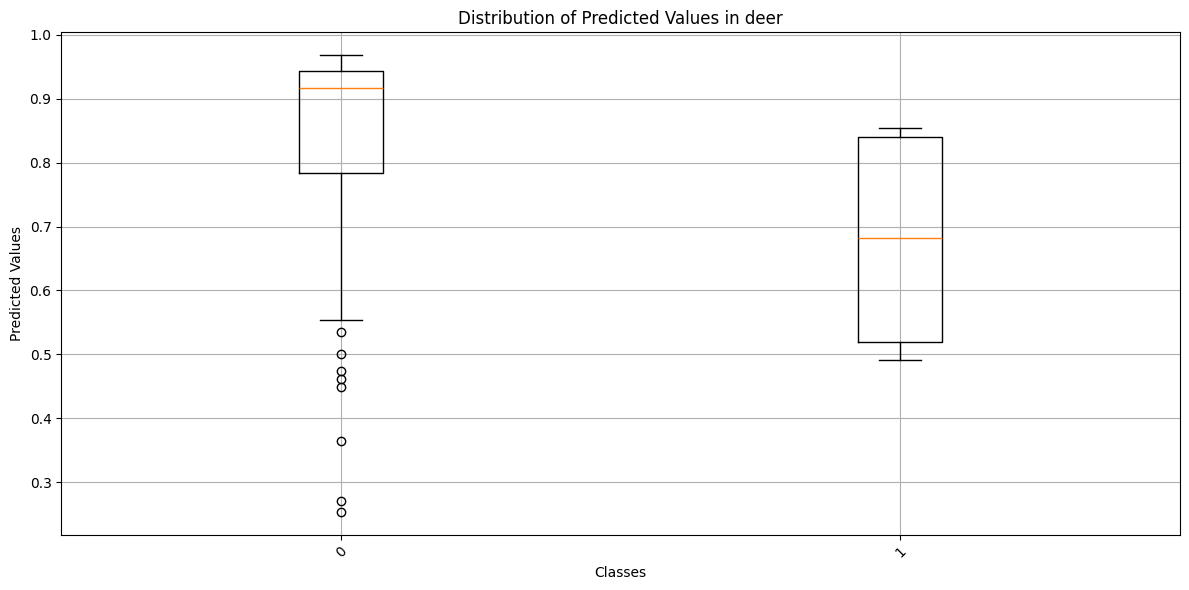

C:\Users\Z0127829\AppData\Local\Temp\ipykernel_12412\147381925.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(predicted_values, labels=classes_new)


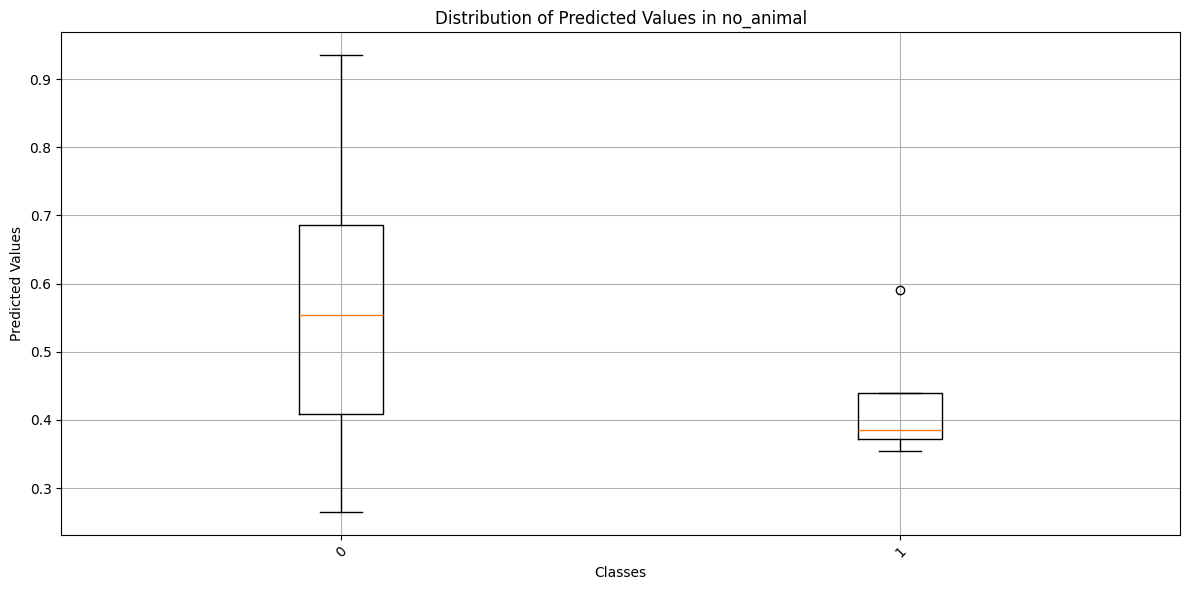

C:\Users\Z0127829\AppData\Local\Temp\ipykernel_12412\147381925.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(predicted_values, labels=classes_new)


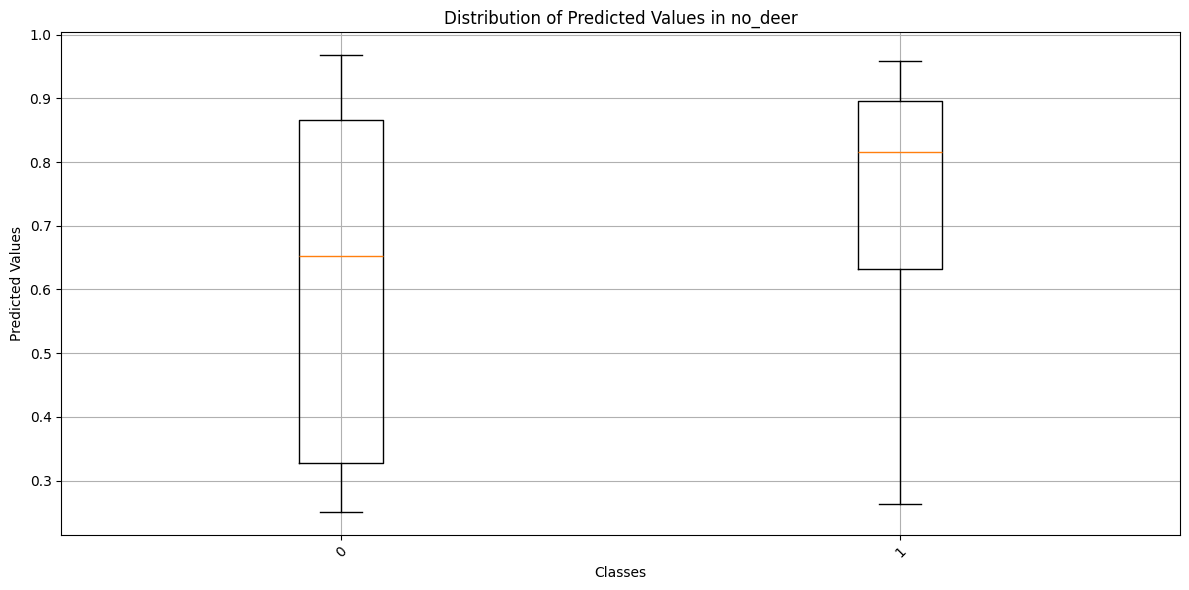

In [7]:
for folder in folders:
    plt.figure(figsize=(12, 6))
    plt.title(f'Distribution of Predicted Values in {folder}')

    predicted_values = [class_counts[folder][cls] for cls in classes if cls != "no_deer_or_wild_boar"]
    classes_new = ["0","1"]
    plt.boxplot(predicted_values, labels=classes_new)
    plt.xlabel('Classes')
    plt.ylabel('Predicted Values')

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**box (box):**<br>
- the line in the middle of the box shows the median of the data distribution.<br>
- the box itself extends from one quartile to the other. The lower edge of the box represents the 25th percentile (lower quartile), while the upper edge represents the 75th percentile (upper quartile).<br>
- thus, the box covers the middle 50% range of the data.<br>

**Whiskers (stripes):**<br>
- whiskers extend from the edges of the box to the outermost data points that are within a certain distance of the quartiles.<br>
- there are various ways in which the length of the whiskers can be calculated, e.g. up to 1.5 times the interquartile range or up to the minimum or maximum of the data, depending on the implementation or setting.<br>

**Outliers:**<br>
- oints outside the whiskers are considered outliers and marked separately. These are data points that deviate significantly from the main distribution.<br>

**Optional: Wahrscheinlichkeiten für Klasse pro Vorhersage speichern**

In [ ]:
import torch
import torch.nn as nn
from ultralytics import YOLO

# Vortrainiertes YOLO-Modell laden
model = YOLO('path/to/your/custom_model.pt')

# Feature-Extraktionsschichten extrahieren
backbone = nn.Sequential(*list(model.model.children())[:-1])

# Klassifikationsschicht extrahieren und anpassen
class CustomClassifier(nn.Module):
    def __init__(self, backbone, num_classes):
        super(CustomClassifier, self).__init__()
        self.backbone = backbone
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=backbone_output_size, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x

# Anzahl der Klassen definieren
num_classes = 10  # Beispiel: 10 Klassen
backbone_output_size = 1024  # Beispielwert, anpassen je nach Backbone

# Angepasstes Klassifizierungsmodell erstellen
custom_classifier_model = CustomClassifier(backbone, num_classes)

# Modell trainieren (Beispiel)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(custom_classifier_model.parameters(), lr=0.001)
# Train your model here...

# Vorhersagen durchführen und Wahrscheinlichkeiten ausgeben
inputs = torch.randn(1, 3, 224, 224)  # Beispiel-Eingabebild
outputs = custom_classifier_model(inputs)
probs = torch.softmax(outputs, dim=1)
print(probs)

In [ ]:
# def predict_image(image_path):
#     # Modell auf neuen Bildern testen
#     results = model.predict(source=path_test, save=True)
#     print(results)
#     classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#     # max_prediction_value, predicted_class_index = torch.max(output, 1)

#     # convert max_prediction_value to a float
#     # max_prediction_value = max_prediction_value.item()
#     # max_prediction_value = round(max_prediction_value, 4)

#     predicted_class = classes[predicted_class_index]
#     return predicted_class, max_prediction_value